# 데이터 불러오기
## SELECT 문으로 불러오기

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
con = sqlite3.connect("lpoint.db", isolation_level=None)

In [3]:
# 01_DEMO
demo = pd.read_sql("SELECT * FROM DEMO", con, index_col=None)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [4]:
# 03_COP_U
cop_u = pd.read_sql("SELECT * FROM COP_U", con, index_col=None)
cop_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     248304 non-null  object
 1   rct_no   248304 non-null  object
 2   cop_c    248304 non-null  object
 3   br_c     248304 non-null  object
 4   chnl_dv  248304 non-null  int64 
 5   de_dt    248304 non-null  int64 
 6   vst_dt   248304 non-null  int64 
 7   de_hr    248304 non-null  int64 
 8   buy_am   248304 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.0+ MB


## 두 데이터 합치기

In [5]:
data = pd.merge(cop_u, demo, on = 'cust', how = 'left')

In [71]:
data.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액', '성별', '연령대', '거주지분류대코드']
data.head()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,남성,70대,Z17
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,남성,70대,Z17
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,남성,70대,Z17
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,남성,70대,Z17
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,남성,70대,Z17


In [19]:
data.to_csv("./data/cop_u.csv", index = False, encoding='utf-8')

# 데이터 분석
점포코드(br_c)에 50개 정도 결측치 존재.

In [6]:
data = pd.read_csv('./data/cop_u.csv', encoding='utf-8')

In [7]:
data.head()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,남성,70대,Z17
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,남성,70대,Z17
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,남성,70대,Z17
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,남성,70대,Z17
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,남성,70대,Z17


In [33]:
data.tail()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지분류대코드
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,여성,20대,Z10
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,여성,20대,Z10
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,여성,30대,Z12
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,남성,20대,Z17
248303,M761634870,21122419C013829696,C01,C010014,2,20211224,20211225,19,28000,남성,30대,Z17


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   고객번호      248304 non-null  object
 1   영수증번호     248304 non-null  object
 2   제휴사       248304 non-null  object
 3   점포코드      248249 non-null  object
 4   채널구분      248304 non-null  int64 
 5   이용일자      248304 non-null  int64 
 6   방문일자      248304 non-null  int64 
 7   이용시간      248304 non-null  int64 
 8   이용금액      248304 non-null  int64 
 9   성별        248304 non-null  object
 10  연령대       248304 non-null  object
 11  거주지분류대코드  248304 non-null  object
dtypes: int64(5), object(7)
memory usage: 22.7+ MB


In [32]:
## 방문일자와 이용일자 같은지 비교
print('방문일자, 이용일자가 다른 행 개수:', len(data) - sum(data.방문일자 == data.이용일자))
print(np.where(data.방문일자 == data.이용일자))

방문일자, 이용일자가 다른 행 개수: 15572
(array([     0,      1,      2, ..., 248300, 248301, 248302], dtype=int64),)


## 단순 시각화

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

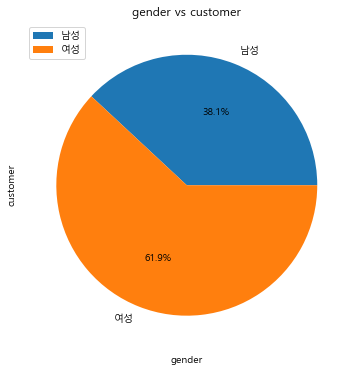

In [36]:
## 성별에 따른 구매금액 비교
plt.figure(figsize=(12,6))
x = data.groupby(by='성별').sum().index
y = data.groupby(by='성별').sum()['이용금액']

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('gender vs customer')
plt.xlabel('gender')
plt.ylabel('customer')
plt.pie(y, labels=x.values, autopct = '%.1f%%')
plt.legend(loc='best')
plt.show()

# 군집분석
## 필요한 라이브러리 불러오기

In [13]:
import sqlite3
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine

from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes

import time
from ipypb import ipb
from tqdm import tqdm_notebook

## 데이터 전처리

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   고객번호      248304 non-null  object
 1   영수증번호     248304 non-null  object
 2   제휴사       248304 non-null  object
 3   점포코드      248249 non-null  object
 4   채널구분      248304 non-null  int64 
 5   이용일자      248304 non-null  int64 
 6   방문일자      248304 non-null  int64 
 7   이용시간      248304 non-null  int64 
 8   이용금액      248304 non-null  int64 
 9   성별        248304 non-null  object
 10  연령대       248304 non-null  object
 11  거주지분류대코드  248304 non-null  object
 12  구매월       248304 non-null  object
dtypes: int64(5), object(8)
memory usage: 24.6+ MB


### 구매월 변수 추가

In [10]:
data['구매월'] = data['이용일자'].map(lambda x: str(x)[4:6]+'월')
data.head()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지분류대코드,구매월
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,남성,70대,Z17,10월
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,남성,70대,Z17,11월
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,남성,70대,Z17,02월
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,남성,70대,Z17,09월
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,남성,70대,Z17,10월


### 변수 스케일링

In [15]:
## 기존 수치형 변수에 대해서
scaled_X = MinMaxScaler().fit_transform(data[['이용일자', '이용시간', '이용금액']])
data[['이용일자', '이용시간', '이용금액']] = scaled_X

### 범주형 변수 확인

In [19]:
catcol = [data.columns.get_loc(col) for col in list(data.select_dtypes('object').columns)]
print('Categorical columns {}'.format(list(data.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catcol))

Categorical columns ['고객번호', '영수증번호', '제휴사', '점포코드', '성별', '연령대', '거주지분류대코드', '구매월']
Categorical columns position : [0, 1, 2, 3, 9, 10, 11, 12]


### 데이터프레임을 행렬 형태로 전환

In [20]:
dfTomatrix = data.to_numpy()
dfTomatrix

array([['M839993508', '21102612B015763935', 'B01', ..., '70대', 'Z17',
        '10월'],
       ['M839993508', '21110610B014219744', 'B01', ..., '70대', 'Z17',
        '11월'],
       ['M839993508', '21021112B013419710', 'B01', ..., '70대', 'Z17',
        '02월'],
       ...,
       ['M014154595', '21121209C015324520', 'C01', ..., '30대', 'Z12',
        '12월'],
       ['M510878172', '21112719C013369102', 'C01', ..., '20대', 'Z17',
        '11월'],
       ['M761634870', '21122419C013829696', 'C01', ..., '30대', 'Z17',
        '12월']], dtype=object)

## 군집분석
Elbow Method : Cluster 간의 거리의 합을 나타내는 값이 급격히 떨어지는 구간을 군집 개수로 설정

In [22]:
# Choose optimal K using Elbow method
cost = []
for cluster in ipb(range(1, 7)):
    try:
        kprototype = KPrototypes(n_jobs = -1, max_iter = 50, n_clusters = cluster, init = 'Huang',
                                 random_state = 0, verbose = True)
        kprototype.fit_predict(dfTomatrix, categorical = catcol)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
    time.sleep(0.1)

 [############################################################] 0/6 [0<0, 0.00s/it]

## 군집분석 시각화

In [ ]:
# Elbow 메소드 시각화
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 7), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
from sklearn.cluster import KMeans
